In [3]:
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [5]:

from transformers import BertTokenizer, AutoTokenizer,BertModel, AutoModel 

tokenizer_ = AutoTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D")

model_ = AutoModel.from_pretrained("facebook/esm2_t33_650M_UR50D")

outputs_ = model_(**tokenizer_("MEILCEDNISLSSIPNSLMQLGDGPRLYHNDFNSRDANTSEASNWTIDAENRTNLSCEGYLPPTCLSILHLQEKNWSALLTTVVIILTIAGNILVIMAVSLEKKLQNATNYFLMSLAIADMLLGFLVMPVSMLTILYGYRWPLPSKLCAIWIYLDVLFSTASIMHLCAISLDRYVAIQNPIHHSRFNSRTKAFLKIIAVWTISVGISMPIPVFGLQDDSKVFKEGSCLLADDNFVLIGSFVAFFIPLTIMVITYFLTIKSLQKEATLCVSDLSTRAKLASFSFLPQSSLSSEKLFQRSIHREPGSYAGRRTMQSISNEQKACKVLGIVFFLFVVMWCPFFITNIMAVICKESCNENVIGALLNVFVWIGYLSSAVNPLVYTLFNKTYRSAFSRYIQCQYKENRKPLQLILVNTIPALAYKSSQLQVGQKKNSQEDAEQTVDDCSMVTLGKQQSEENCTDNIETVNEKVSCV", return_tensors='pt'))


outputs_.keys(),outputs_

outputs_.last_hidden_state[:,0,:]  ##这是获取得到的 cls 蛋白整体代表的向量


Some weights of the model checkpoint at facebook/esm2_t33_650M_UR50D were not used when initializing EsmModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing EsmModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[ 0.0415,  0.0070,  0.1090,  ..., -0.2770,  0.0945, -0.0448]],
       grad_fn=<SliceBackward0>)

Some weights of the model checkpoint at facebook/esm2_t33_650M_UR50D were not used when initializing EsmModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing EsmModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


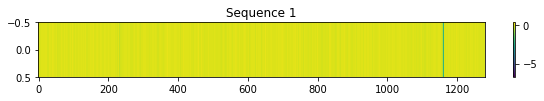

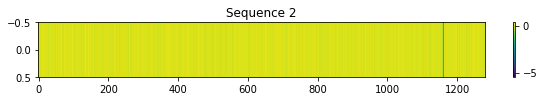

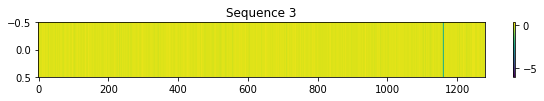

In [11]:
from transformers import AutoModel, AutoTokenizer
import torch
import matplotlib.pyplot as plt

# 加载模型和分词器
model_name = "facebook/esm2_t33_650M_UR50D"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

model.eval()  # 将模型设置为评估模式

# 准备数据
data = [
    "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG",
    "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE",
    # 注意：transformers库可能不直接支持处理带有<mask>标记的序列
    "KALTARQQEVFDLIRD ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"
]

# 处理数据并提取表示
sequence_representations = []
for sequence in data:
    inputs = tokenizer(sequence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # 提取序列的平均表示
    seq_repr = outputs.last_hidden_state.mean(1)
    sequence_representations.append(seq_repr)

# 这里我们简单地可视化每个序列的平均表示
for i, seq_repr in enumerate(sequence_representations):
    plt.figure(figsize=(10, 1))
    plt.imshow(seq_repr.cpu().numpy(), aspect='auto')
    plt.title(f"Sequence {i+1}")
    plt.colorbar()
    plt.show()
